In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# summary description
def describe(img, title='plot'):
    print('shape: '+str(img.shape))  
    print('type: '+str(type(img)))

    fig = plt.figure(figsize=(20,20))  # 20x20 magnification
    ax = fig.add_subplot(1,1,1)
    plt.title(title)
    mg = ax.imshow(img)
    plt.colorbar(mg, ax=ax)

shape: (800, 800, 3)
type: <class 'numpy.ndarray'>


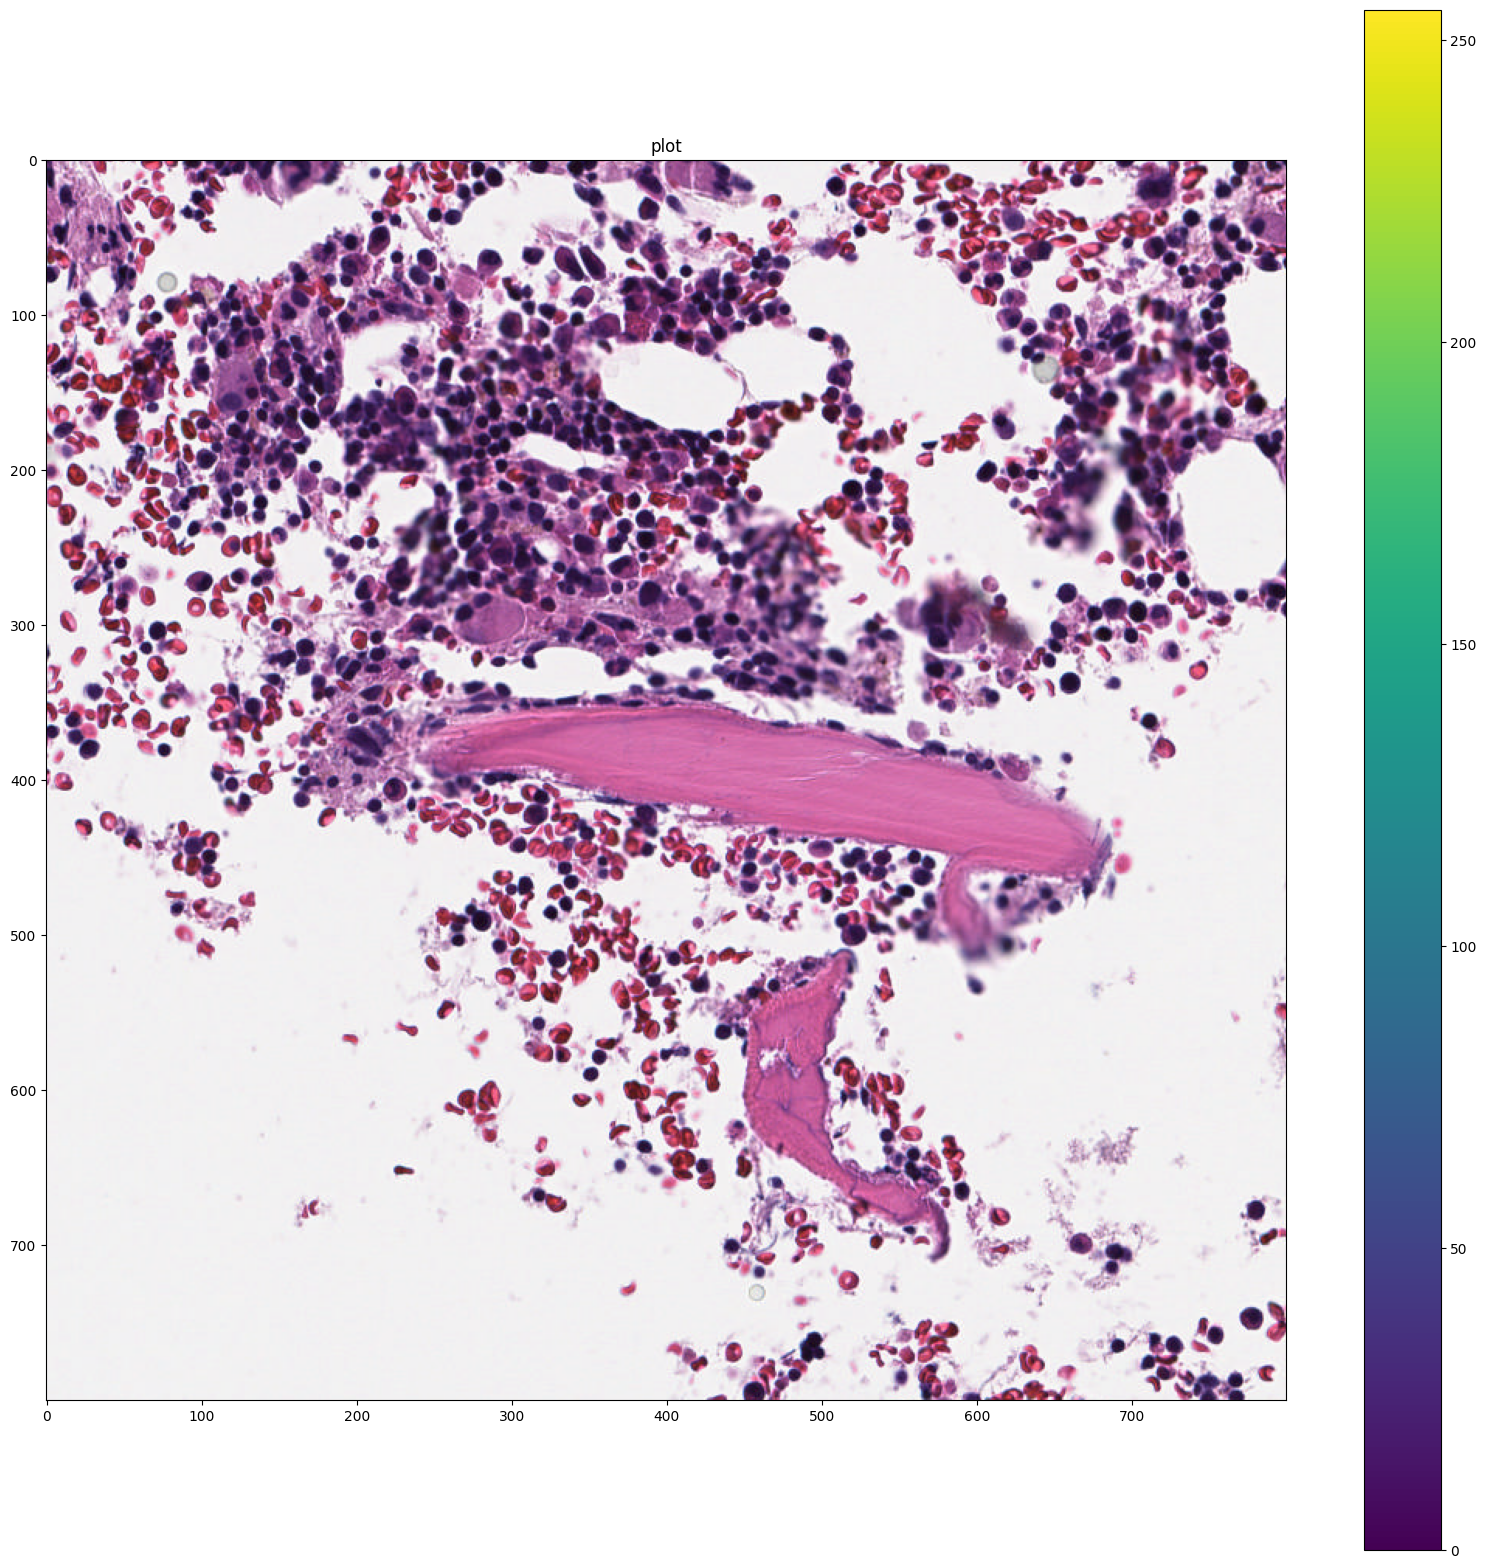

In [3]:
img = cv2.imread("1354466-32800-7300.tiff")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
describe(img)

In [4]:
# https://stackoverflow.com/questions/8863810/python-find-similar-colors-best-way
def color_dist_vector(fst, snd, normalize=True):
    if normalize:
        fst = fst.astype('float64') / 255.0
        snd = snd.astype('float64') / 255.0
    rm = 0.5 * (fst[:, 0] + snd[:, 0])
    drgb = (fst - snd) ** 2
    t = np.array([2 + rm, 4 + 0 * rm, 3 - rm]).T
    return np.sqrt(np.sum(t * drgb, 1))

In [5]:
def gen_map(cval):
    c = np.array([cval] * img.shape[0])
    x = np.ones(shape=(800, 800))
    for count, v in enumerate(img):
        x[count] = color_dist_vector(c, v)
    return x

1.487910244272219
shape: (800, 800)
type: <class 'numpy.ndarray'>


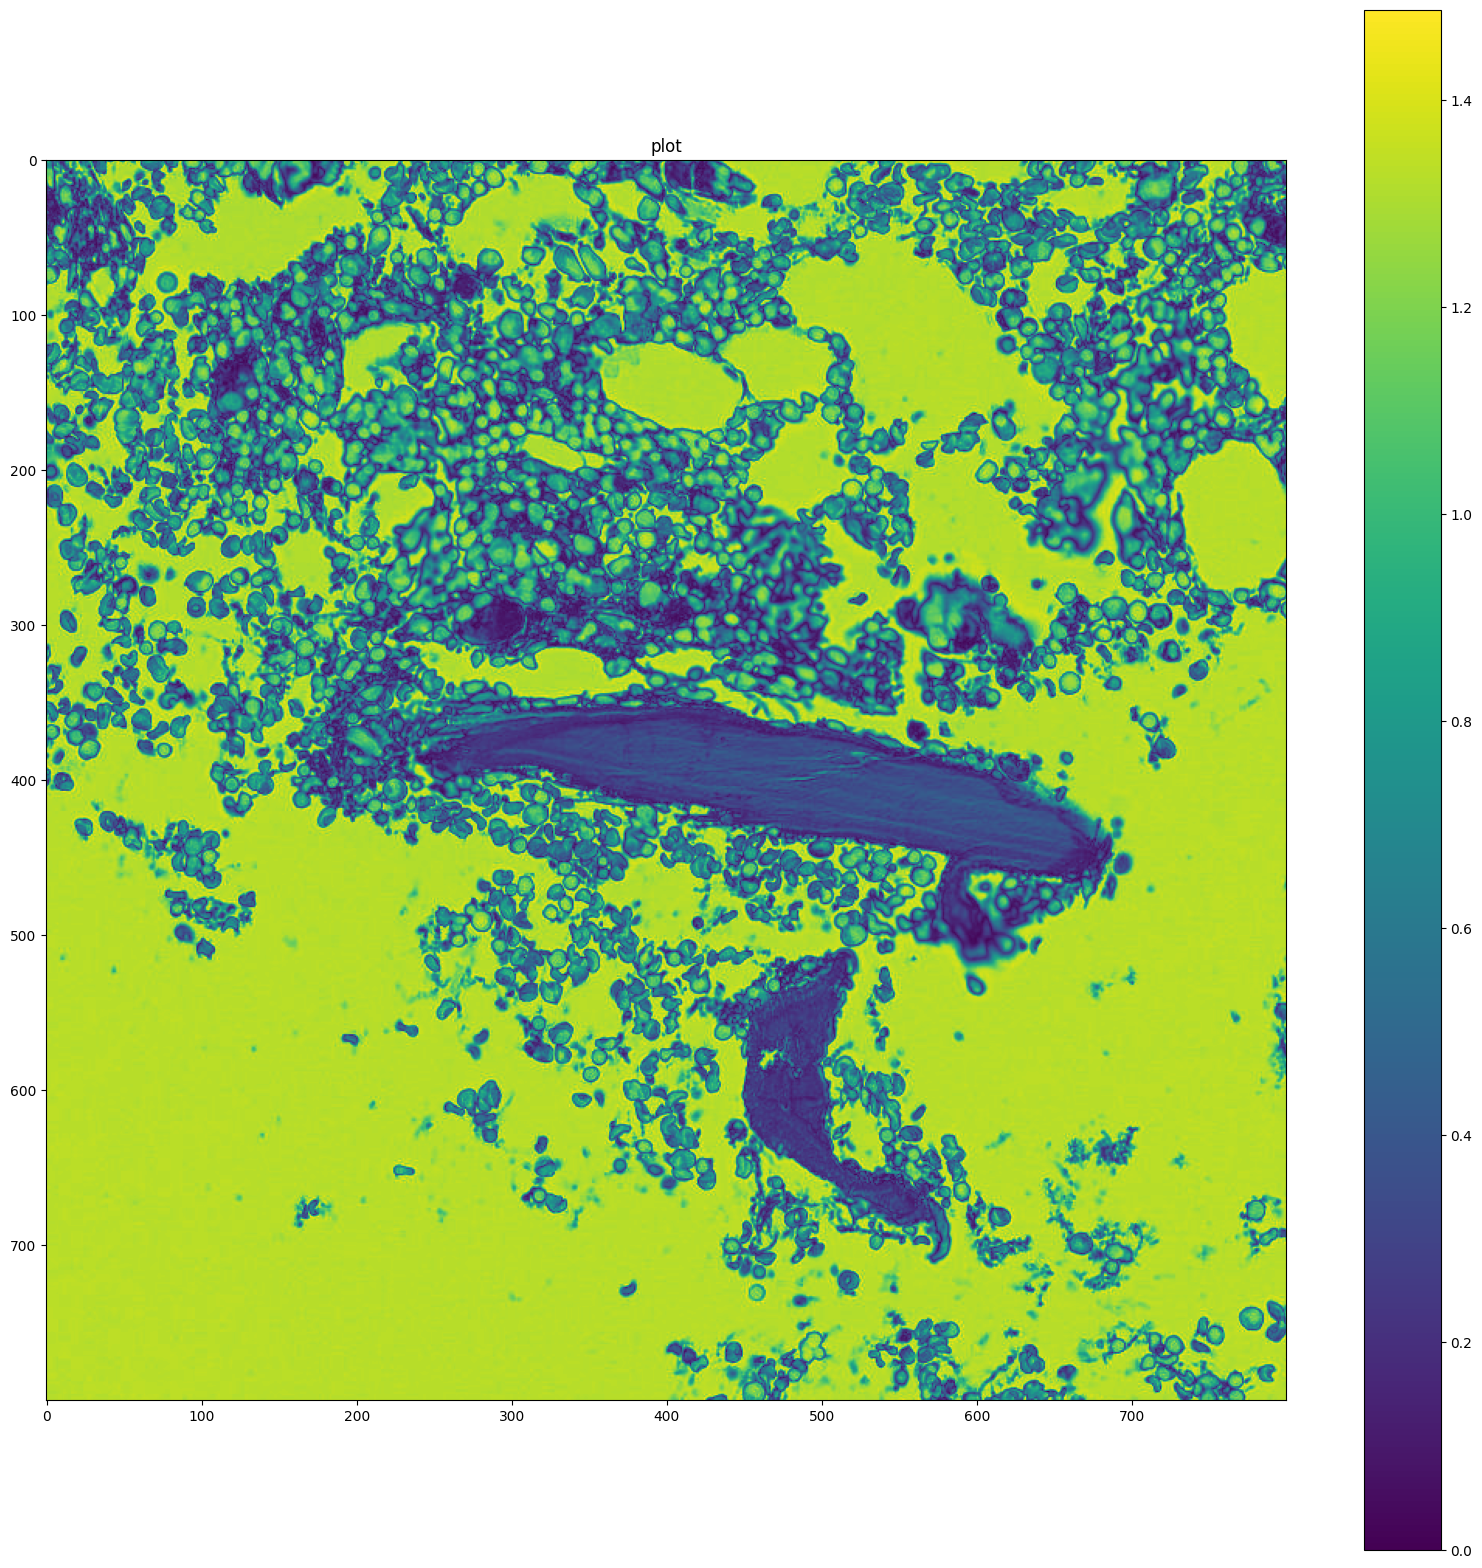

In [6]:
x = gen_map(img[300, 275])
print(max(x.flatten()))
describe(x)

In [ ]:
def get_thresh(coords, bound_range, cval=False, x=None):
    if cval is not False:
        x = gen_map(cval)
    s = np.sum(x[coords[0]-bound_range[0]:coords[0]+bound_range[0], coords[1]-bound_range[1]:coords[1]+bound_range[1]])
    avg = s / (bound_range[0]*2*bound_range[1]*2)
    return s, avg

In [ ]:
def automate(detect_thresh, confirm_thresh, x):
    x = x[50:750, 50:750] # effeectively padding to prevent out of bounds error, can come up with a more elegant solution later
    r = []
    for i_count, i_val in enumerate(x):
        for j_count, j_val in enumerate(i_val):
            z = get_thresh((i_count, j_count))
            if j_val < thresh and z[1] < confirm_thresh:
                r.append(((i_count, j_count), z, (30, 30), x=x))
    return r

In [ ]:
x = gen_map(img[300, 300])
y = automate(0.1, x)
y

In [ ]:
imgcpy = img.copy()
xcpy = x.copy()
blank = np.zeros(shape=imgcpy.shape)
for i in y:
    xc = i[0][0]
    yc = i[0][1]
    avg = i[1][1]
    imgcpy[xc, yc] = [0, 255*(3-avg), 0]
    xcpy[xc, yc] = 10*(3-avg)
    blank[xc, yc] = [255*(3-avg), 0, 0]

In [ ]:
describe(imgcpy)